In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/dataset_dhaka_rent.csv")
df.shape
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [2]:
xArea = df["area"]
xArea.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [3]:
yRent = df["rent"]
yRent.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [4]:
df.isnull().sum()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    60 non-null     int64
 1   rent    60 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


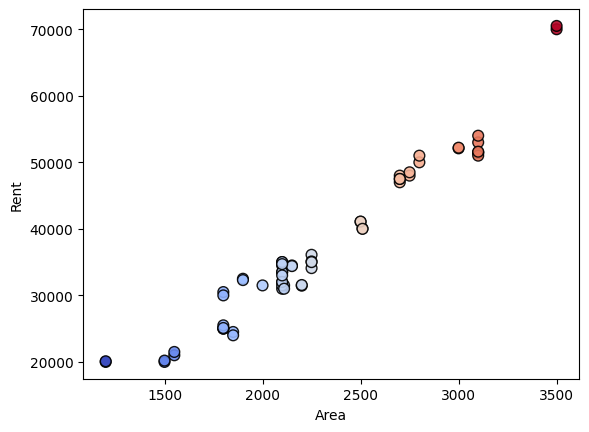

In [5]:
def rentPlot():
    plt_x = np.array(xArea)
    plt_y = np.array(yRent)
    plt.scatter(df["area"], df["rent"], 
                c = df['area'],
                cmap='coolwarm',  
                s=60, 
                alpha=.90,
                edgecolor='k')
    plt.xlabel("Area")
    plt.ylabel("Rent")

rentPlot()

# Correlation of Area and Rent

In [6]:
df.corr()

,area,rent
area,1.000000,0.974807
rent,0.974807,1.000000


# Calculate m(Slope)

In [7]:
dev_xArea = xArea - xArea.mean()
dev_yRent = yRent - yRent.mean()

m = np.sum(dev_xArea*dev_yRent) / np.sum(dev_xArea**2)
print(float(m))

21.292661473611954


# Calculate Intercept

In [8]:
b = np.mean(yRent) - m*np.mean(xArea)
print(float(b))

-11469.7354464311


# Prediction

In [9]:
xArea.head()

0    2000
1    2100
2    2500
3    2250
4    3000
Name: area, dtype: int64

In [10]:
yRent.head()

0    31500
1    35000
2    41050
3    36100
4    52100
Name: rent, dtype: int64

In [11]:
yPredict = m*2500 + b
yPredict
print(float(yPredict))

41761.91823759879


In [12]:
listPredicted = []
for i in range(len(xArea)):
    yAllPredict = m*xArea[i] + b
    # print(yAllPredict)
    listPredicted.append(float(yAllPredict))
    
print(listPredicted)

[31115.58750079281, 33244.85364815401, 41761.91823759879, 36438.7528691958, 52408.24897440476, 28986.321353431616, 20469.256763986832, 27921.68827975102, 46020.45053232118, 33244.85364815401, 34309.486721834604, 33244.85364815401, 33244.85364815401, 41974.84485233491, 36438.7528691958, 54537.51512176595, 26857.05520607042, 21533.889837667426, 26857.05520607042, 46020.45053232118, 33457.780262890126, 33244.85364815401, 63054.57971121075, 14081.458321903247, 48149.71667968237, 54537.51512176595, 47085.083606001775, 26857.05520607042, 35374.1197955152, 54537.51512176595, 33244.85364815401, 33244.85364815401, 41761.91823759879, 36438.7528691958, 52408.24897440476, 28986.321353431616, 20469.256763986832, 27921.68827975102, 46020.45053232118, 33244.85364815401, 34309.486721834604, 33244.85364815401, 33244.85364815401, 41974.84485233491, 36438.7528691958, 54537.51512176595, 26857.05520607042, 21533.889837667426, 26857.05520607042, 46020.45053232118, 33457.780262890126, 33244.85364815401, 6305

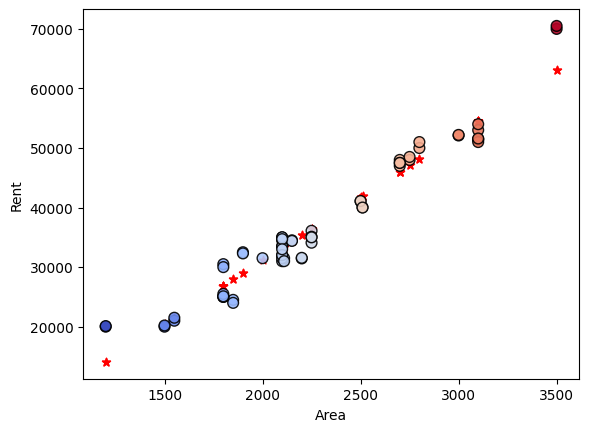

In [13]:
plt.scatter(xArea, listPredicted, color='red', marker='*')
rentPlot()

# Sci-kit learn implementation - approach without using  Linear Regression formula

In [14]:
from sklearn.linear_model import LinearRegression
obj_lr = LinearRegression()

In [15]:
xTrain = df[['area']]
yTrain = df['rent']
xTrain.head()

,area
0,2000
1,2100
2,2500
3,2250
4,3000


In [16]:
obj_lr.fit(xTrain, yTrain)

LinearRegression()

# Validation of scikit approch of m(Slope) and general approach of m(Slope)

In [17]:
mSciKit = obj_lr.coef_

mSciKitTemp = round(float(mSciKit), 5)
mTemp = round(float(m), 5)
print(f"Scikit approach (m) : {mSciKitTemp}")
print(f"general approach (m) : {mTemp}")

if mSciKitTemp == mTemp:
    print(True)

Scikit approach (m) : 21.29266
general approach (m) : 21.29266
True


C:\Users\ARM_AVI\AppData\Local\Temp\ipykernel_2668\2631025101.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mSciKitTemp = round(float(mSciKit), 5)


# Comparison of scikit approch of y(Intercept) and general approach of y(Intercept)

In [18]:
bScikit = obj_lr.intercept_

bScikitTemp = round(bScikit, 4)
bTemp = round(b, 4)

print(f"Scikit approach (b) : {bScikitTemp}")
print(f"General approach (b) : {bTemp}")

if bScikitTemp == bTemp:
    print(True)


Scikit approach (b) : -11469.7354
General approach (b) : -11469.7354
True


# Predict for one independent variable (x)

In [19]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [20]:
singlePrediction = obj_lr.predict([[2500]])
print(int(singlePrediction))

41761


C:\Users\ARM_AVI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ARM_AVI\AppData\Local\Temp\ipykernel_2668\2455326937.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(singlePrediction))


# Prediction for all indpendent variables

In [21]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [22]:
multiplePrediction = obj_lr.predict(df[['area']])
multiplePrediction

array([31115.58750079, 33244.85364815, 41761.9182376 , 36438.7528692 ,
       52408.2489744 , 28986.32135343, 20469.25676399, 27921.68827975,
       46020.45053232, 33244.85364815, 34309.48672183, 33244.85364815,
       33244.85364815, 41974.84485233, 36438.7528692 , 54537.51512177,
       26857.05520607, 21533.88983767, 26857.05520607, 46020.45053232,
       33457.78026289, 33244.85364815, 63054.57971121, 14081.4583219 ,
       48149.71667968, 54537.51512177, 47085.083606  , 26857.05520607,
       35374.11979552, 54537.51512177, 33244.85364815, 33244.85364815,
       41761.9182376 , 36438.7528692 , 52408.2489744 , 28986.32135343,
       20469.25676399, 27921.68827975, 46020.45053232, 33244.85364815,
       34309.48672183, 33244.85364815, 33244.85364815, 41974.84485233,
       36438.7528692 , 54537.51512177, 26857.05520607, 21533.88983767,
       26857.05520607, 46020.45053232, 33457.78026289, 33244.85364815,
       63054.57971121, 14081.4583219 , 48149.71667968, 54537.51512177,
      

In [23]:
dfMulPredict = df.copy()
dfMulPredict['predicted'] = obj_lr.predict(df[['area']])
dfMulPredict.tail()

,area,rent,predicted
55,3100,54000,54537.515122
56,2750,48500,47085.083606
57,1800,25100,26857.055206
58,2200,31560,35374.119796
59,3100,51600,54537.515122


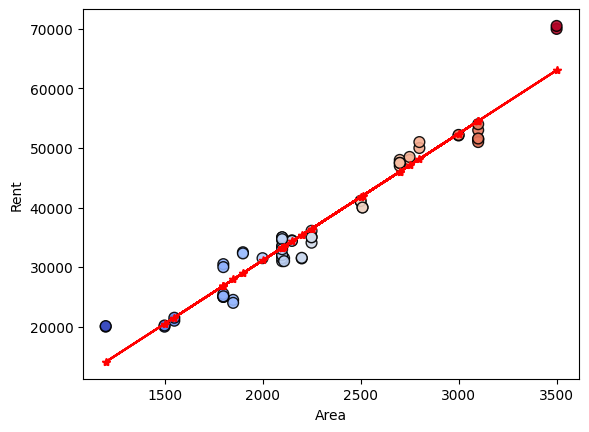

In [24]:
plt.plot(xArea, dfMulPredict['predicted'], color='red', marker='*')
rentPlot()

# Score

In [25]:
obj_lr.score(df[['area']], df[['rent']])

0.950249380357677

# Mean Square and Mean Absolute Error Evaluation

In [26]:
df.head()

,area,rent
0,2000,31500
1,2100,35000
2,2500,41050
3,2250,36100
4,3000,52100


In [27]:
dif_1 = obj_lr.predict([[2000]])
dif_2 = obj_lr.predict([[2100]])
print(dif_1)
print(dif_2)

[31115.58750079]
[33244.85364815]


C:\Users\ARM_AVI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\ARM_AVI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [28]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mse = mean_squared_error(df[['rent']], dfMulPredict['predicted'])
mse

6778077.204095561

In [29]:
mae = mean_absolute_error(df[['rent']], dfMulPredict['predicted'])
mae

2009.8695093576282